In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity
from ts_data_generator.schema.converter import SchemaConverter

In [2]:
s = SchemaConverter(csv_file_path='../etc/data/sample.csv',index_col=0)

In [3]:
s.data

,product,product_id,const,sales
datetime,,,,
2019-01-01 00:00:00,B,1.837537,5,0.006766
2019-01-01 00:05:00,A,1.651797,5,0.014702
2019-01-01 00:10:00,B,3.959611,5,0.074836
2019-01-01 00:15:00,A,1.825650,5,0.069115
2019-01-01 00:20:00,A,2.160533,5,0.111073
...,...,...,...,...
2019-02-11 23:40:00,C,1.840233,5,20.560828
2019-02-11 23:45:00,C,2.644273,5,20.592392
2019-02-11 23:50:00,C,2.350574,5,20.569147


In [10]:
trend_info = s.analyze_numeric_trends(columns=['sales'],top_freq=2)
trend_info

{'sales': {'linear': {'slope': np.float64(0.0012580992499720647),
   'intercept': np.float64(1.2719018813163614)},
  'sinusoidal': [{'angular_frequency': np.float64(0.0010190727595896967),
    'magnitude': np.float64(2.641104664116923),
    'phase_offset': np.float64(3.091254575095097)},
   {'angular_frequency': np.float64(0.003165627319833041),
    'magnitude': np.float64(4.102900880542041),
    'phase_offset': np.float64(-0.24507420358347298)}]}}

In [11]:
s.construct_trend_column('sales', trend_info['sales'])

In [12]:
df = s.data[['sales','sales_constructed']]

In [13]:
normalized_df = (df-df.min())/(df.max()-df.min())

<Axes: xlabel='datetime'>

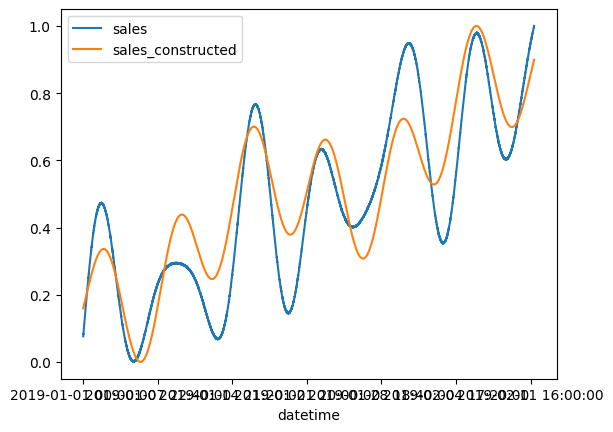

In [14]:
normalized_df.plot()